# Exploratory Analysis

## Exploring Final Filtered Mutation DS

### Convert File to Feather

In [2]:

# load in final-filtered-mut-netphos dataset for familiarization
import pandas as pd
import os 
import time

# set paths to relative paths
csv_path = '../JacobSubset/filtered/mut/final-filtered-mut-netphos.csv'
feather_path = '../JacobSubset/filtered/mut/final-filtered-mut-netphos.feather'

# compare reading times for csv and feather files
start_csv = time.time()
df_csv = pd.read_csv(csv_path)
end_csv = time.time() - start_csv

# convert to feather
df_csv.to_feather(feather_path)

# get file sizes
csv_size = os.path.getsize(csv_path) / 1024
feather_size = os.path.getsize(feather_path) / 1024

# time loading speed for feather file
start_feather = time.time()
df_feather = pd.read_feather(feather_path)
end_feather = time.time() - start_feather

# compare file sizes and run times: 
print(f'CSV file size: {csv_size:.2f} kb')
print(f'Feather file size: {feather_size:.2f} kb')
print(f'CSV read time: {end_csv:.4f} seconds')
print(f'Feather read time: {end_feather:.4f} seconds')



CSV file size: 1529.84 kb
Feather file size: 1300.66 kb
CSV read time: 0.0459 seconds
Feather read time: 0.0072 seconds



## Explore Final Filtered Mut Netphos DS

### Check Dataset for Shape and Length

In [ ]:

# get basic descriptive stats for dataset
print(f'Length: {len(df_feather)}')
print('')
print(f'Array Shape: {df_feather}')


Length: 43424

Array Shape:         Gene wt  pos mut    context  score  kinase  answer
0      ABCB1  S   35   N  KPTVSNFSM  0.470  CaM-II       0
1      ABCB1  S   35   N  KPTVSNFSM  0.469     PKA       0
2      ABCB1  S   35   N  KPTVSNFSM  0.440    GSK3       0
3      ABCB1  S   35   N  KPTVSNFSM  0.413     PKG       0
4      ABCB1  S   35   N  KPTVSNFSM  0.365     CKI       0
...      ... ..  ...  ..        ...    ...     ...     ...
43419  ZFP36  Y  157   Y  CHKFYYQGR  0.023    unsp       0
43420  ZFP36  Y  164   Y  GRCPYYSRC  0.441    INSR       0
43421  ZFP36  Y  164   Y  GRCPYYSRC  0.361     SRC       0
43422  ZFP36  Y  164   Y  GRCPYYSRC  0.336    EGFR       0
43423  ZFP36  Y  164   Y  GRCPYYSRC  0.024    unsp       0

[43424 rows x 8 columns]


### Check for Missing Data and Frequencies of Categorical Variables

In [ ]:

print(f'Amount of missing entries: {df_feather.isnull().sum()}')
print(F' Amount of unique entries per column: {df_feather.nunique(dropna=False)}')


Amount of missing entries: Gene       0
wt         0
pos        0
mut        0
context    0
score      0
kinase     0
answer     0
dtype: int64
 Amount of unique entries per column: Gene         53
wt           13
pos        1503
mut          21
context    3264
score       978
kinase       18
answer        2
dtype: int64


## Clean up Answer Column

In [ ]:

# answer column is currently in wrong dtype and hard to interpret
df_feather['answer'] = df_feather['answer'].apply(lambda x: 1 if str(x).strip().upper() == 'YES' else 0).astype(int)
print(df_feather['answer'].value_counts())


answer
0    40544
1     2880
Name: count, dtype: int64


## Bar Chart for Frequency

<Axes: xlabel='wt', ylabel='count'>

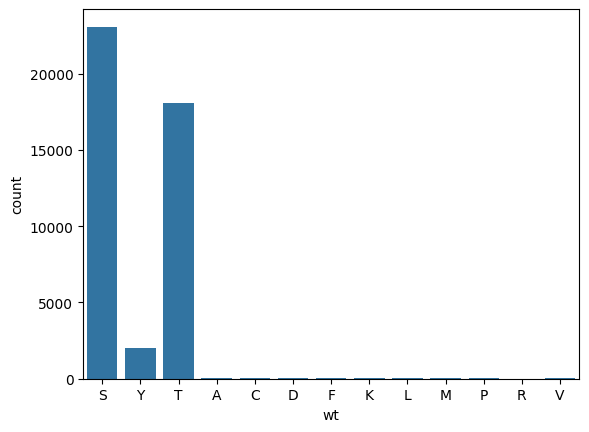

In [ ]:

# import necessary packages
import seaborn as sns
import matplotlib.pyplot as plt

# create countplot
sns.countplot(data=df_feather, x='wt')


+ High frequency of S & T
+ Distant third in Y
+ All other have trace amounts


<Axes: xlabel='mut', ylabel='count'>

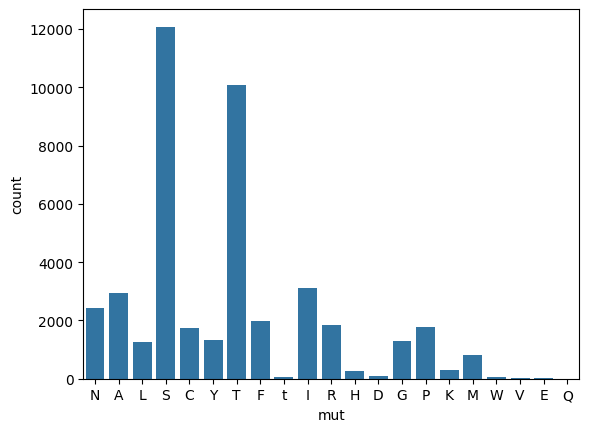

In [ ]:

# cconstruct same plot but change x to mut
sns.countplot(data=df_feather, x='mut')


+ S & T have highest freq.
  + Follows same behavior as wt graph
+ t, D, K, W, V, E, Q nearly no representation

<Axes: xlabel='kinase', ylabel='count'>

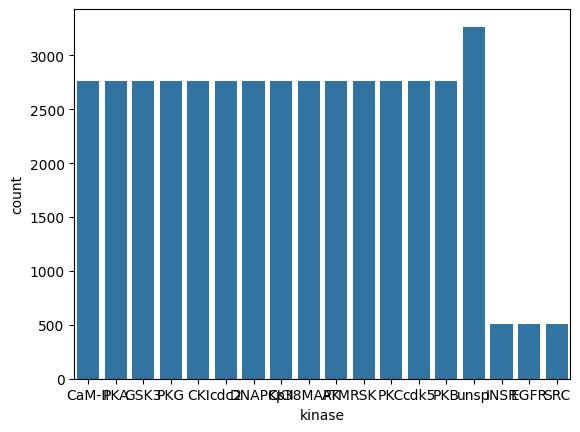

In [ ]:

# countplot for kinase
sns.countplot(data=df_feather, x='kinase')


+ Fairly equal distribution of kinase
  + Three pairs at the end severely undersampled/under represented


## Understand Sampling Relationship for Classes

In [ ]:

# check how imbalanced class distribution is
answer_counts = df_feather['answer'].value_counts()
print(f'Number of Class 0 instances: {answer_counts.get(0)}')
print(f'Number of Class 1 instances: {answer_counts.get(1)}')



Number of Class 0 instances: 40544
Number of Class 1 instances: 2880


+ Fairly uneven class distribution
  + May look into SMOTE if preliminary model underperforms

## Boxplots for finding "Answer"

### Score by Answer Class

<function matplotlib.pyplot.show(close=None, block=None)>

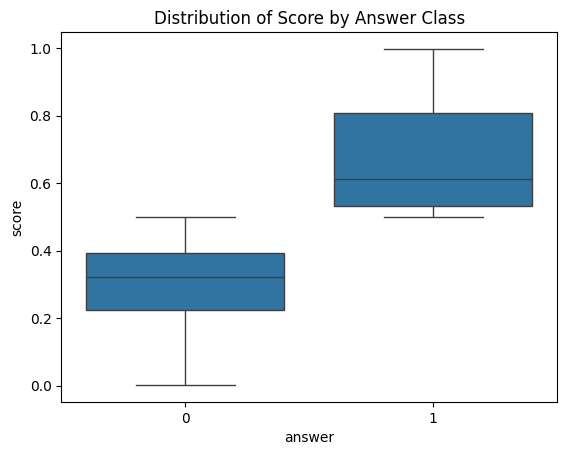

In [ ]:

# construct boxplot to visualize distribution of both class instances
sns.boxplot(data=df_feather, x='answer', y='score')
plt.title('Distribution of Score by Answer Class')
plt.show


### Position by Answer Class

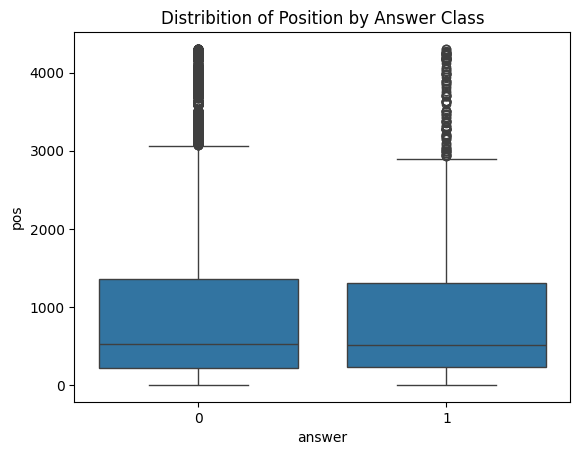

In [ ]:

# construct same boxplot but swap score for position
sns.boxplot(data=df_feather, x='answer', y='pos')
plt.title('Distribition of Position by Answer Class')
plt.show()


### Now Substitute Answer with Kinase

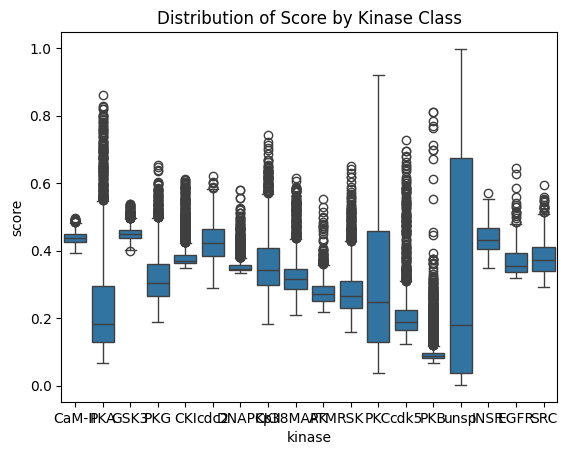

In [ ]:

sns.boxplot(data=df_feather, x='kinase', y='score')
plt.title('Distribution of Score by Kinase Class')
plt.show()


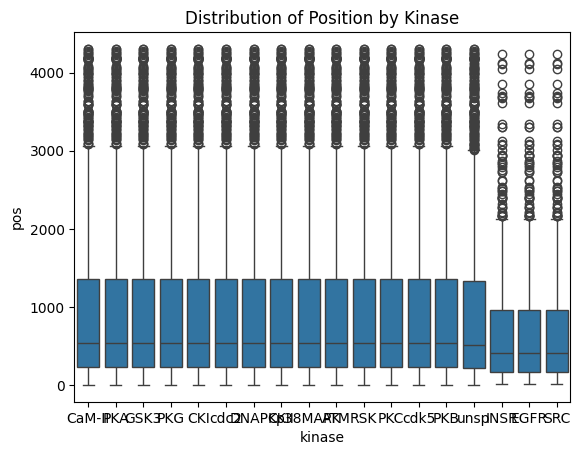

In [ ]:

sns.boxplot(data=df_feather, x='kinase', y='pos')
plt.title('Distribution of Position by Kinase')
plt.show()


## Immediate Takeaways:
+ Variable relationship between:
    + Score and Answer Class
    + Score and Kinase
+ Non-variable relationships:
    + Position and Answer Class
    + Position and Kinase
+ Position may not be an important factor in predicting score
    + Boxplot shows a nearly identical distribution for class 0 &  1

## Construct Correlation Matrix

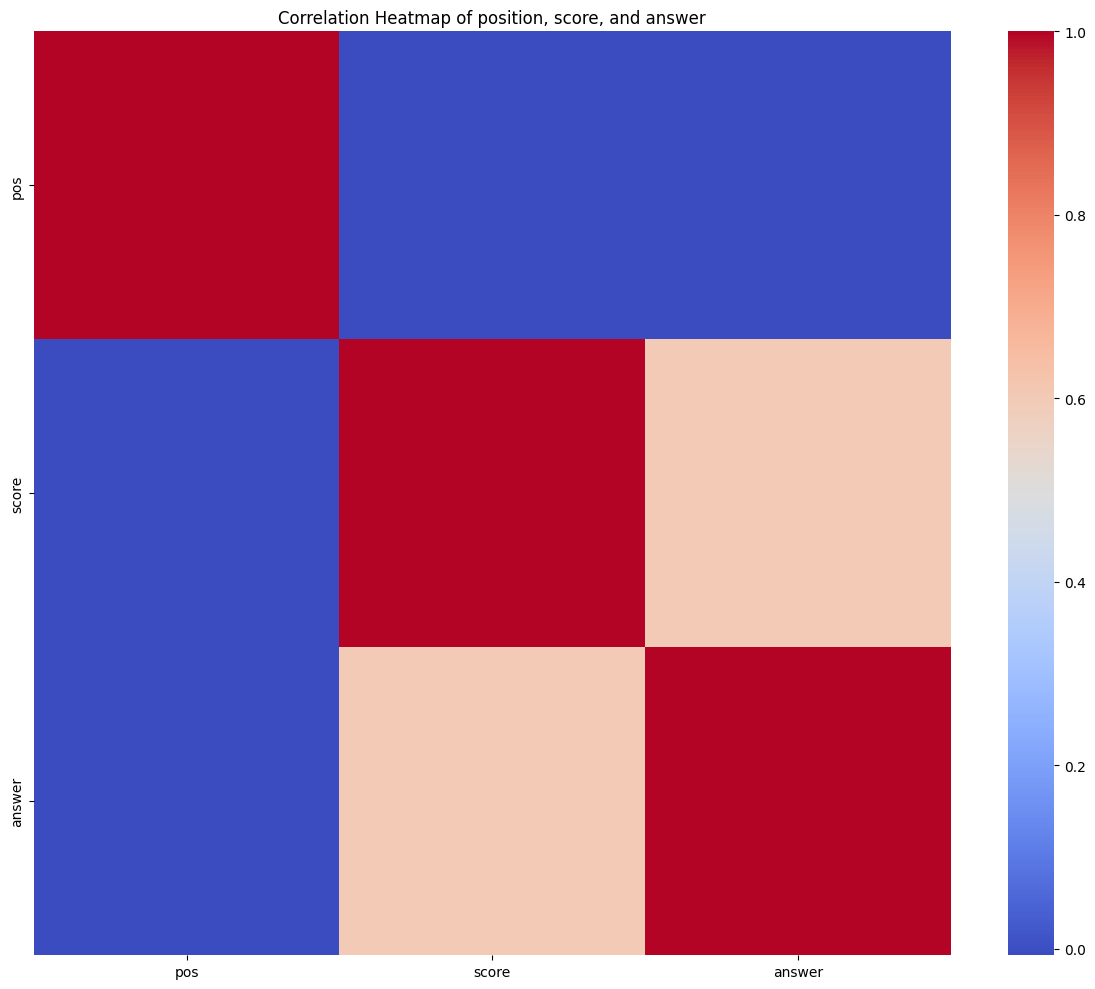

In [59]:

# grab copy of df for corr
numeric_df = df_feather[['pos', 'score', 'answer']].copy()
corr_matrix = numeric_df.corr()

# construct corr heat map
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap of position, score, and answer')
plt.tight_layout()
plt.show()




+ No helpful, extremely linear (positive and negative) for the relationships we chose to examine
    + Only tested numeric columns
+ Will test out kinase in next iteration

Text(0.5, 1.0, 'Correlation Heatmap between Kinase Type and Answer Class')

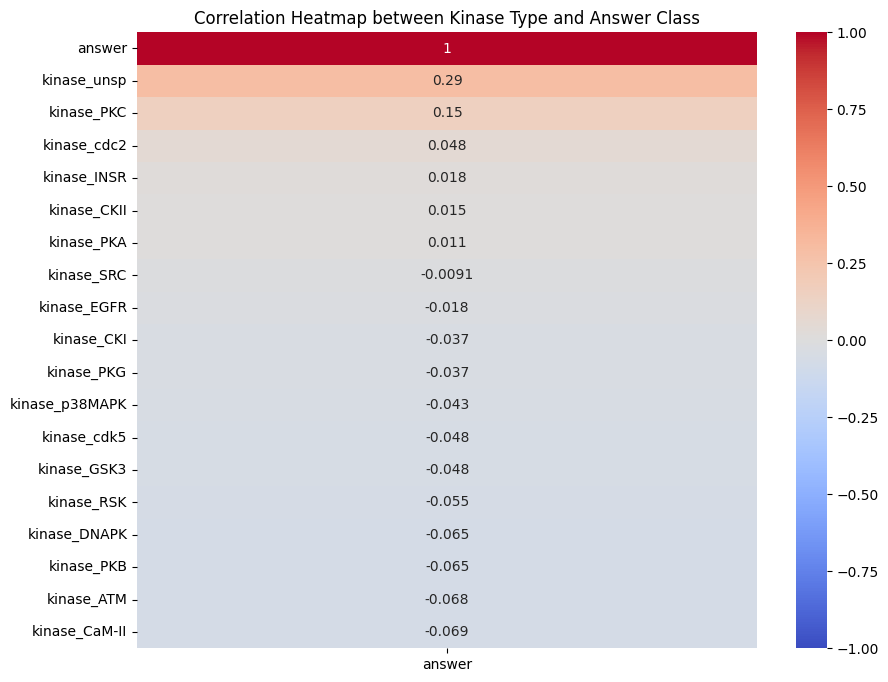

In [64]:

df_encoded = pd.get_dummies(df_feather, columns=['kinase'], prefix= 'kinase', drop_first=False)
kinase_cols = [col for col in df_encoded.columns if col.startswith('kinase_')]
kinase_df = df_encoded[kinase_cols + ['answer']]

corr_matrix = kinase_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix[['answer']].sort_values(by='answer', ascending=False),
            annot = True, cmap = 'coolwarm', vmin = -1, vmax = 1, cbar = True)
plt.title('Correlation Heatmap between Kinase Type and Answer Class')

+ This iteration of corr heatmap is much more insightful
+ Interpretations
    + kinase_unsp : Fairly strong positive correlation when this kinase is present with class 1
    + kinase_PKC : Mild positive relationship with class 1 
    + Several kinase types with mild negative correlations:
        + kinase_RSK
        + kinase_DNAPK
        + kinase_PKB
        + kinase_ATM
        + kinase_CAM-II
    + Most others show trace amounts of a positive/negative relationship
+ During feature selection in model preprocessing, take note of the outlier kinase types